In [1]:
%matplotlib inline
%load_ext memory_profiler
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData

import time
import numpy as np

from eden.converter.graph.gspan import gspan_to_eden
from eden.graph import Vectorizer

In [2]:
graphs = gspan_to_eden( 'http://www.bioinf.uni-freiburg.de/~costa/bursi.gspan' )
vectorizer = Vectorizer( r=2,d=5 )
%time %memit datasetBursi = vectorizer.transform( graphs )

peak memory: 482.20 MiB, increment: 387.77 MiB
CPU times: user 22.5 s, sys: 100 ms, total: 22.6 s
Wall time: 23.8 s


In [3]:
print "Shape: ", datasetBursi.shape
print "Approximate number of non-zero features: ", datasetBursi.nnz / float(datasetBursi.shape[0])
print "Sparsity: ", datasetBursi.nnz / float(datasetBursi.shape[0]) / datasetBursi.shape[1]

Shape:  (4337, 1048577)
Approximate number of non-zero features:  373.168549689
Sparsity:  0.000355880922134


In [4]:
from sklearn.neighbors import NearestNeighbors
brute_force = NearestNeighbors()
brute_force.fit(datasetBursi)
brute_force.kneighbors()

(array([[ 0.41188687,  0.43005043,  0.82381435,  0.843017  ,  0.84429937],
        [ 0.82394165,  1.05938071,  1.06497218,  1.06510413,  1.08514473],
        [ 1.12865025,  1.13166623,  1.13175583,  1.13412053,  1.14099944],
        ..., 
        [ 0.78491992,  0.96478785,  0.96582518,  0.96901103,  0.99273667],
        [ 1.10811347,  1.11260042,  1.17220033,  1.17859399,  1.1888055 ],
        [ 0.96196131,  0.96432349,  0.96593611,  0.9753024 ,  0.9926015 ]]),
 array([[3883, 2852, 4197, 2836, 3513],
        [ 486, 2151, 1531, 1266,  292],
        [ 181, 3908,  126, 1117, 2840],
        ..., 
        [4318, 2958, 4070,  185, 3544],
        [1806, 1247, 3156, 1570, 2916],
        [2995,  731, 3211, 1325, 3803]]))

### Optimized minHash for accuracy >= 0.95

In [5]:
n_neighbors = 10
max_bin_size= 45
shingle_size = 1
similarity=False
number_of_cores=4
prune_inverse_index=14
store_value_with_least_sigificant_bit=0
excess_factor=10
prune_inverse_index_after_instance=0.0
remove_hash_function_with_less_entries_as=0
shingle=0
block_size=1
minHashOptimal = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [6]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(datasetBursi, minHashOptimal, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[100, 200, 400, 600, 800, 1000])

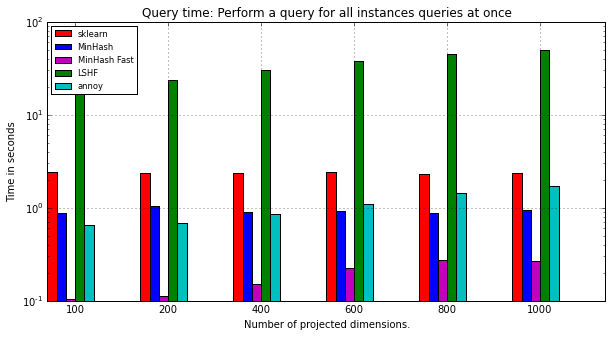

In [7]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "MinHash", "MinHash Fast", "LSHF", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

#### One query to get the nearest neighbors of all instances.
 * Annoy, MinHash and MinHash Fast are all faster than the brute force algorithm, LSHF is slower. 
This is independet from the number of projected dimensions.
 * MinHash Fast is about one magnitude faster than annoy. MinHash is only faster for 1000 or more dimensions.
 * MinHash performs well for very high dimensional (about 1 Mio) and very sparse (~on average 300 - 400 non zero features; sparsity factor of 0.0003) datasets. 

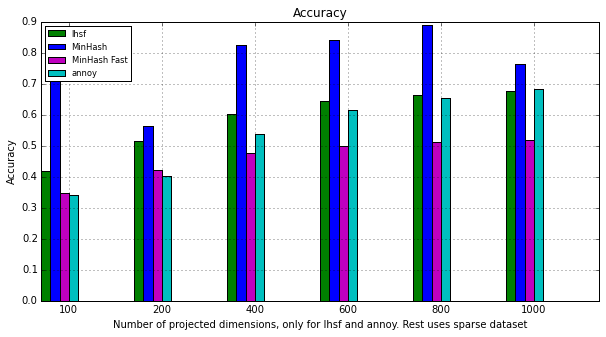

In [8]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "MinHash", "MinHash Fast", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* MinHash Fast is more accurate for 100 projections, otherwise annoy
* LSHF is more accurate than annoy and MinHash Fast
* MinHash is by far the most accurate

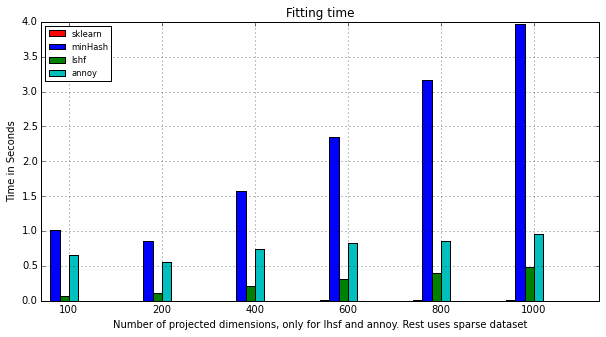

In [9]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting time from MinHash is by far the most time consuming
* LSHF is faster than annoy
* Increase of the fitting time for MinHash significant more than annoy or LSHF

### Optimized for accuracy >= 0.9

In [13]:
n_neighbors = 10
max_bin_size= 86
shingle_size = 1
similarity=False
number_of_cores=4
prune_inverse_index=10
store_value_with_least_sigificant_bit=3
excess_factor=5
prune_inverse_index_after_instance=1.0
remove_hash_function_with_less_entries_as=0
shingle=0
block_size=1
minHashNinety = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [14]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(datasetBursi, minHashNinety, n_neighbors_sklearn, n_neighbors_minHash, 
                                    number_of_hashfunctions=[100, 200, 400, 600, 800, 1000], 
                                    size_of_query=None)

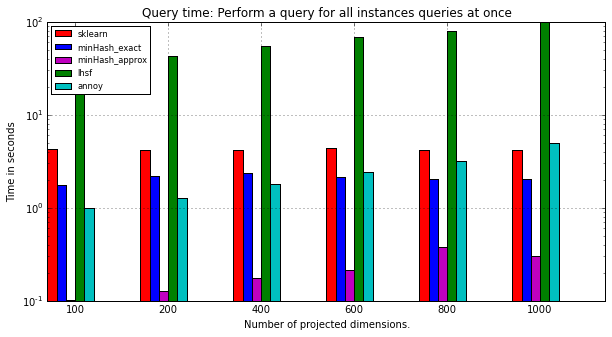

In [15]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

#### One query to get the nearest neighbors of all instances.
 * Annoy and MinHash Fast and MinHash are faster than the brute force algorithm, LSHF is slower. 
This is is valid from the number of projected dimensions <= 800. For 1000 instances, annoy is slower than the brute force algorithm.
 * MinHash Fast is the fastest algorithm, for dim <= 400 annoy is faster than MinHash, after it is slower. 
 * MinHash performs well independet from the sparsity factor.

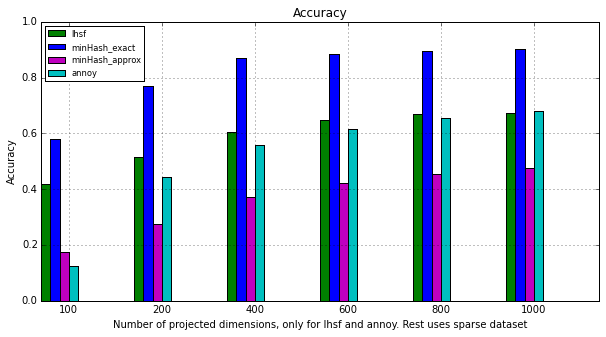

In [16]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* MinHash is the most accurate algorithm
* For 800 projections it is faster than annoy and 25% more accurate.

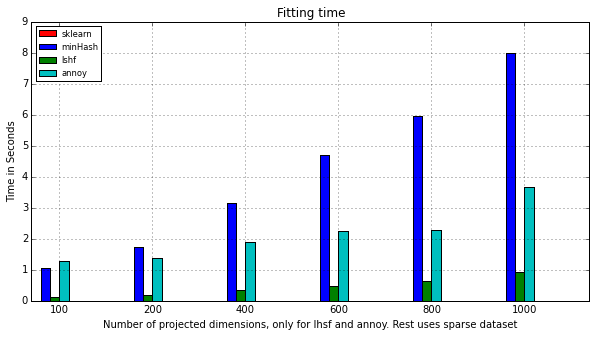

In [17]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting time from MinHash is by far the most time consuming
* LSHF is faster than annoy
* Increase of the fitting time from MinHash grows significant more than annoy or LSHF

### Optimized for accuracy >= 0.7

In [18]:
n_neighbors = n_neighbors_minHash
max_bin_size= 54
shingle_size = 4
similarity=False
number_of_cores=4
prune_inverse_index=0
store_value_with_least_sigificant_bit=1
excess_factor=8
prune_inverse_index_after_instance=0.0
remove_hash_function_with_less_entries_as=603
shingle=1
block_size=4
minHashSeventy = [n_neighbors, max_bin_size, shingle_size, similarity, number_of_cores, 
        prune_inverse_index, store_value_with_least_sigificant_bit, 
        excess_factor, prune_inverse_index_after_instance, 
        remove_hash_function_with_less_entries_as, shingle, block_size]

In [19]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(datasetBursi, minHashSeventy, n_neighbors_sklearn, n_neighbors_minHash, 
                                    number_of_hashfunctions=[100, 200, 400, 600, 800, 1000], 
                                    size_of_query=None)

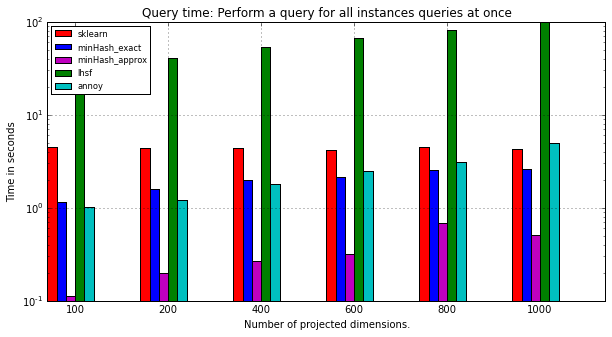

In [20]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions.",
         number_of_features=1, title='Query time: Perform a query for all instances queries at once')

#### One query to get the nearest neighbors of all instances.
 * MinHash Fast is the fastest algorithm
 * MinHash and annoy are performe now at the same level

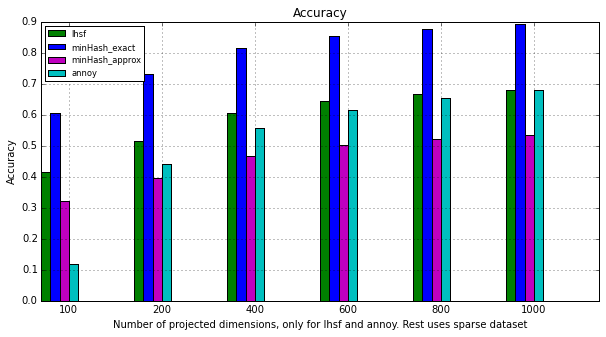

In [21]:
plotData(data=returnValuesBursi[9:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

* MinHash Fast is only for 100 dimensions better than annoy
* MinHash is always significant more accurate than annoy with almost the same performance.

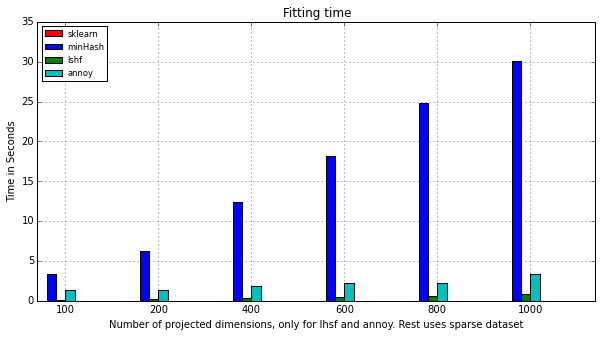

In [22]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

* Fitting time from MinHash is by far the most time consuming